In [1]:
!pip install wordcloud

     |████████████████████████████████| 368kB 1.0MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [118]:
!pip install xgboost

     |████████████████████████████████| 127.6MB 24kB/s  eta 0:00:01113.8MB 2.6MB/s eta 0:00:44     |██████▌                         | 25.7MB 5.6MB/s eta 0:00:19        | 49.7MB 13.2MB/s eta 0:00:06     |█████████████████████▌          | 85.5MB 26.6MB/s eta 0:00:02     |████████████████████████▎       | 96.8MB 5.4MB/s eta 0:00:06
You should consider upgrading via the 'pip install --upgrade pip' command.


In [119]:
!pip install --upgrade xgboost

Requirement already up-to-date: xgboost in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (1.1.1)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [120]:
import pandas as pd
import numpy as np
import xgboost as xgb
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
data_df = pd.read_csv('Dataset_sentiment.csv',header=[0])

In [4]:
data_df.head()

,Text,Spam,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: naturally irresistible your corporate...,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Subject: the stock trading gunslinger fanny i...,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_df.columns

Index(['Text', 'Spam', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [6]:
df = data_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7'], axis=1)

In [7]:
df.head()

,Text,Spam
0,NaN,NaN
1,Subject: naturally irresistible your corporate...,1.0
2,NaN,NaN
3,Subject: the stock trading gunslinger fanny i...,1.0
4,NaN,NaN


In [8]:
df = df.dropna().reset_index()

In [9]:
df = df.drop('index', axis=1)

In [10]:
df.head()

,Text,Spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


In [11]:
df.isnull().sum()

Text    0
Spam    0
dtype: int64

In [12]:
df['Spam'].unique()[1]

0.0

In [13]:
df['Text'][1]

'Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esma\nrk perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no \n libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic \nnot clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey\n and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no '

In [14]:
import re

def clean_text(string_in):
    string_in = re.sub(r"subject","", string_in)
    string_in = re.sub(r"[^'A-Za-z0-9 ]+", "", string_in) # Remove all characters other than words a-z,A-Z,0-9
    string_in = re.sub(r"\d", " ", string_in)   # Remove numbers  
    string_in = re.sub(r"_+", " ", string_in)   # Remove consecutive underscores
    string_in = string_in.lower()              # Tranform to lower case    
    
    return string_in.strip()



In [15]:
df["Text"] = df['Text'].apply(clean_text)

In [16]:
df['Text'] = df['Text'].str.replace("subject","")
df['Text'] = df['Text'].str.replace(" ' ",'o')

In [17]:
df['Text'].head()

0     naturally irresistible your corporate identit...
1     the stock trading gunslinger  fanny is merril...
2     unbelievable new homes made easy  im wanting ...
3       color printing special  request additional ...
4     do not have money  get software cds from here...
Name: Text, dtype: object

In [18]:
df.Spam.value_counts()

0.0    3629
1.0    1368
Name: Spam, dtype: int64

In [19]:
df.iloc[0,0]

' naturally irresistible your corporate identity  lt is really hard to recollect a company  the  market is full of suqgestions and the information isoverwhelminq  but a good  catchy logo  stylish statlonery and outstanding website  will make the task much easier   we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader  it isguite ciear that  without good products  effective business organization and practicable aim it  will be hotat nowadays market  but we do promise that your marketing efforts  will become much more effective  here is the list of clear  benefits  creativeness  hand  made  original logos  specially done  to reflect your distinctive company image  convenience  logo and stationery  are provided in all formats  easy  to  use content management system letsyou  change your website content and even its structure  promptness  you  will see logo drafts within three business days  affordability  your  marketing break  through shouldn

In [20]:
df['Text'] = df['Text'].str.replace("/ +/g", ' ')

In [21]:
df['Text'].head()

0     naturally irresistible your corporate identit...
1     the stock trading gunslinger  fanny is merril...
2     unbelievable new homes made easy  im wanting ...
3       color printing special  request additional ...
4     do not have money  get software cds from here...
Name: Text, dtype: object

In [22]:
df.iloc[0,0]

' naturally irresistible your corporate identity  lt is really hard to recollect a company  the  market is full of suqgestions and the information isoverwhelminq  but a good  catchy logo  stylish statlonery and outstanding website  will make the task much easier   we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader  it isguite ciear that  without good products  effective business organization and practicable aim it  will be hotat nowadays market  but we do promise that your marketing efforts  will become much more effective  here is the list of clear  benefits  creativeness  hand  made  original logos  specially done  to reflect your distinctive company image  convenience  logo and stationery  are provided in all formats  easy  to  use content management system letsyou  change your website content and even its structure  promptness  you  will see logo drafts within three business days  affordability  your  marketing break  through shouldn

In [23]:
import json
with open('contractions.json', 'r') as f:
    cont_dic = json.load(f)

In [24]:
type(cont_dic)
#contractions_df = pd.DataFrame({'substitutes': data})

dict

In [25]:
def cont_to_meaning(val): 
  
    for x in val.split(): 
        if x in cont_dic.keys(): 
            val = val.replace(x, cont_dic[x]) 
    return val

In [26]:
df['Text'] = df['Text'].apply(lambda x: cont_to_meaning(x))

In [27]:
df.iloc[0,0]

' naturally irresistible your corporate identity  lt is really hard to recollect a company  the  market is full of suqgestions and the information isoverwhelminq  but a good  catchy logo  stylish statlonery and outstanding website  will make the task much easier   we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader  it isguite ciear that  without good products  effective business organization and practicable aim it  will be hotat nowadays market  but we do promise that your marketing efforts  will become much more effective  here is the list of clear  benefits  creativeness  hand  made  original logos  specially done  to reflect your distinctive company image  convenience  logo and stationery  are provided in all formats  easy  to  use content management system letsyou  change your website content and even its structure  promptness  you  will see logo drafts within three business days  affordability  your  marketing break  through shouldn

In [28]:
import nltk
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [29]:
#from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize(sentence):
    new_sentence = []
    for word in sentence.split():
        word = lemmatizer.lemmatize(word)
        new_sentence.append(word)
    return(" ".join(new_sentence))


In [30]:
df['Text'] = df['Text'].apply(lemmatize)
df.head(5)

,Text,Spam
0,naturally irresistible your corporate identity...,1.0
1,the stock trading gunslinger fanny is merrill ...,1.0
2,unbelievable new home made easy im wanting to ...,1.0
3,color printing special request additional info...,1.0
4,do not have money get software cd from here so...,1.0


In [31]:
X =  df['Text']
y = df['Spam']

In [32]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3997,)
(3997,)
(1000,)
(1000,)


In [107]:
x_train[0]

'naturally irresistible your corporate identity lt is really hard to recollect a company the market is full of suqgestions and the information isoverwhelminq but a good catchy logo stylish statlonery and outstanding website will make the task much easier we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader it isguite ciear that without good product effective business organization and practicable aim it will be hotat nowadays market but we do promise that your marketing effort will become much more effective here is the list of clear benefit creativeness hand made original logo specially done to reflect your distinctive company image convenience logo and stationery are provided in all format easy to use content management system letsyou change your website content and even it structure promptness you will see logo draft within three business day affordability your marketing break through shouldnot make gap in your budget satisfaction guarant

In [34]:
word_vectorizer = TfidfVectorizer(
                   stop_words='english',
                   sublinear_tf=True,
                   ngram_range=(1,1))
# fit_transform the data
tfidf_word_features = word_vectorizer.fit_transform(x_train)
train_dtm = pd.DataFrame(tfidf_word_features.toarray(), columns=word_vectorizer.get_feature_names())

In [35]:
tfidf_word_features.shape

(3997, 27403)

In [36]:
train_dtm.head()

,aa,aaa,aaaenerfax,aadedeji,aal,aaldous,aall,aaos,aaron,aawesome,...,zwrocic,zwwyw,zwzm,zxghlajf,zyc,zygoma,zymg,zzn,zzncacst,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df.shape

(4997, 2)

In [38]:
df['Spam'].shape

(4997,)

In [39]:
train_dtm.shape

(3997, 27403)

In [40]:
top_dict={}
for c in train_dtm.transpose().columns:
    top = train_dtm.transpose()[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

In [41]:
# the tfidf weights oraganized in a descending manner for the text in first email.
top_dict[0]

[('pagenetips', 0.28480869118192575),
 ('stevestock', 0.28480869118192575),
 ('valuation', 0.22660724473755864),
 ('reflects', 0.1843659943019008),
 ('steve', 0.17446522087596264),
 ('stephen', 0.16314654761704053),
 ('fw', 0.1584798324926342),
 ('stock', 0.14757461604685274),
 ('uk', 0.13524770032232436),
 ('tendency', 0.12369413311094919),
 ('beleive', 0.12369413311094919),
 ('turf', 0.12369413311094919),
 ('diverge', 0.12369413311094919),
 ('dove', 0.12369413311094919),
 ('syndrome', 0.12369413311094919),
 ('aparently', 0.12369413311094919),
 ('portcalc', 0.1193518686639584),
 ('scared', 0.1193518686639584),
 ('iom', 0.11873489565244334),
 ('cell', 0.11785084461369891),
 ('detected', 0.11323179066108437),
 ('tel', 0.10997179887068134),
 ('pride', 0.10888952621409358),
 ('globally', 0.10888952621409358),
 ('january', 0.10878291883601672),
 ('page', 0.10717507348355515),
 ('confusing', 0.10408279528761445),
 ('barrier', 0.10276944821121953),
 ('grown', 0.10276944821121953),
 ('origina

In [42]:
from wordcloud import WordCloud
wc= WordCloud(stopwords='english',background_color="white",colormap="Dark2",max_font_size=150,random_state=42)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


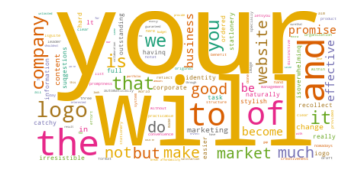

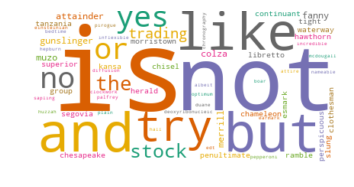

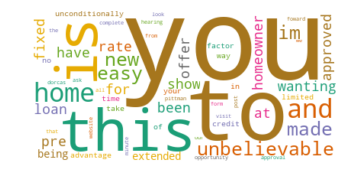

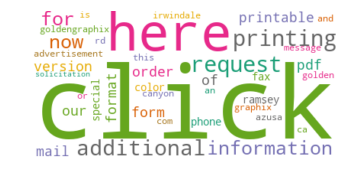

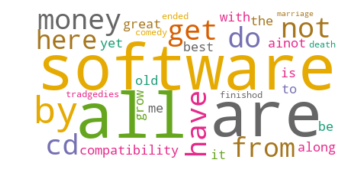

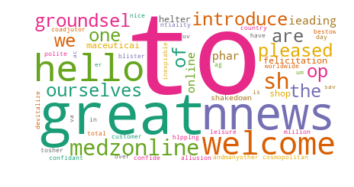

In [43]:
#generating plots for first 12 recipes
import matplotlib.pyplot as plt
%matplotlib inline
for index,email_num in enumerate(train_dtm.transpose().columns[:6]):
    wc.generate(df['Text'][email_num])
    plt.figure(figsize=(12,12))
    plt.subplot(3,2,index+1)
    plt.imshow(wc,interpolation="bilinear")
    plt.axis('off')
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    #plt.title(df['Text'][index])
#plt.subplots_adjust(left=0.125, bottom=0.1, right=0.25, top=0.9, wspace=0.6, hspace=0.3)

#plt.tight_layout()
#plt.show()


In [44]:
label_dict = {'spam':1.0,'ham':0.0}
labels = y_train
print(labels.head())
for index in df['Spam'].unique():
    print(index)

3941    0.0
2757    0.0
4211    0.0
4912    0.0
99      1.0
Name: Spam, dtype: float64
1.0
0.0


In [45]:
# performing chi2 test and getting the indices of the most correlated unigrams and bigrams in a text paragraph.
from sklearn.feature_selection import chi2
import numpy as np
N = 3
for category, value in label_dict.items():
  features_chi2 = chi2(tfidf_word_features, labels == value)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(word_vectorizer.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("#Output label '{}':".format(category))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

#Output label 'spam':
  . Most correlated unigrams:
. vince
. save
. money
  . Most correlated bigrams:
. 
#Output label 'ham':
  . Most correlated unigrams:
. vince
. save
. money
  . Most correlated bigrams:
. 


In [48]:
# Applying simple logistic regresion
losses = []
acc = []
classifier = LogisticRegression(solver='sag', C=10)
cv_loss = np.mean(cross_val_score(classifier, tfidf_word_features,y_train, cv=5,scoring='neg_log_loss'))
losses.append(cv_loss)
print('CV Log_loss scores are {}'.format(losses))
cv_accuracy = np.mean(cross_val_score(classifier, tfidf_word_features,y_train, cv=5,scoring='accuracy'))
acc.append(cv_accuracy)
print('CV Accuracy scores are {}'.format(acc))



CV Log_loss scores are [-0.06430445433838552]
CV Accuracy scores are [0.9894937335839588]


In [123]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SGDClassifier()),
    #('alg_gaussian', GaussianNB()),
    #('alg_svc', SVC(kernel='linear'))
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'tfidf__max_features':[10000, 30000],
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__stop_words': ['english'],
    'tfidf__norm': ('l1', 'l2'),
    
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet')
    #'alg_SVC__C': [1, 10, 100, 1000],
    #'alg_SVC__gamma': [0.001, 0.0001]
                             
    
}

In [125]:
from time import time
grid_search1= GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
print(parameters)
t0 = time()
grid_search_sgd = grid_search1.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search1.best_score_)
print("Best parameters set:")
best_parameters = grid_search1.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf', 'clf']
parameters:
{'tfidf__max_features': [10000, 30000], 'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)], 'tfidf__stop_words': ['english'], 'tfidf__norm': ('l1', 'l2'), 'clf__max_iter': (20,), 'clf__alpha': (1e-05, 1e-06), 'clf__penalty': ('l2', 'elasticnet')}
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.6min finished


done in 153.794s

Best score: 0.990
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'elasticnet'
	tfidf__max_features: 30000
	tfidf__ngram_range: (1, 1)
	tfidf__norm: 'l1'
	tfidf__stop_words: 'english'


In [126]:
y_pred = grid_search_sgd.predict(x_test)

In [129]:
print("\n Classification report: \n{}".format(classification_report(y_test, y_pred)))


 Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       708
         1.0       0.99      0.99      0.99       292

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [121]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', xgb.XGBClassifier(learning_rate =0.1, n_estimators=100, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=42)), 
 
    #('alg_gaussian', GaussianNB()),
    #('alg_svc', SVC(kernel='linear'))
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'tfidf__max_features':[10000, 30000],
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__stop_words': ['english'],
    'tfidf__norm': ('l1', 'l2'),
    
    'clf__max_depth': [4,5,6],
    'clf__min_child_weight': [6,8,10,12]
     
}

In [122]:
from time import time
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
print(parameters)
t0 = time()
grid_search.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf', 'clf']
parameters:
{'tfidf__max_features': [10000, 30000], 'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)], 'tfidf__stop_words': ['english'], 'tfidf__norm': ('l1', 'l2'), 'clf__max_depth': [4, 5, 6], 'clf__min_child_weight': [6, 8, 10, 12]}
Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 46.8min finished


done in 2818.493s

Best score: 0.970
Best parameters set:
	clf__max_depth: 5
	clf__min_child_weight: 6
	tfidf__max_features: 30000
	tfidf__ngram_range: (1, 2)
	tfidf__norm: 'l2'
	tfidf__stop_words: 'english'


In [131]:
y_pred = grid_search.predict(x_test)

In [132]:
print("\n Classification report for xgboost: \n{}".format(classification_report(y_test, y_pred)))


 Classification report for xgboost: 
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       708
         1.0       0.92      0.97      0.94       292

   micro avg       0.97      0.97      0.97      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.97      0.97      0.97      1000

